## Introduction to Neural Network and TensorFlow

### Topics:

* Introduction to Neural Network
    - Neurons
    - Layers
    - Train a neural network
    
* TensorFlow
    - Install
    - const, variable and placeholder
    - Graph
    - Build a neural network

### Neurons

* Neuron is the basic building block of a neural network.
* Artificial neuron is to mimic the biological neuron. 
* Signals can be received from dendrites
* Then sent down the axon once enough signals were received
* This outgoing signal can then be used as another input for other neurons, repeating the process.

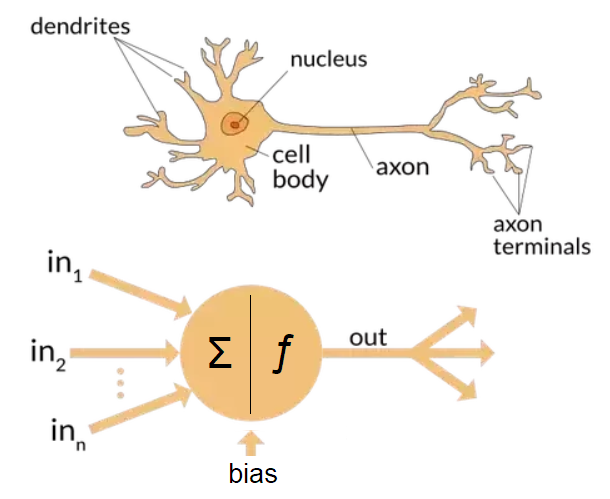

#### More details

* Some signals are more important than others and can trigger some neurons to fire easier. 
* Connections can become stronger or weaker, new connections can appear while others can cease to exist. 
* We can mimic most of this process by coming up with a function that receives a list of weighted input signals and outputs some kind of signal if the sum of these weighted inputs reach a certain bias.

### The math

For a given artificial neuron $k$, let there be $m + 1$ inputs with signals $x_0$ through $x_m$ and weights $w_{k0}$ through $w_{km}$. Usually, the $x_0$ input is assigned the value +1, which makes it a bias input with $w_{k0} = b_k$. This leaves only m actual inputs to the neuron: from $x_1$ to $x_m$.

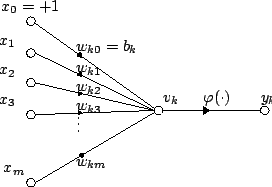

A neuron takes inputs, does some math with them, and produces one output. Write into a formula, the output of the kth neuron is:

$$\large y_{k}=\varphi \left(\sum _{j=0}^{m}w_{kj}x_{j}\right)$$

Where $ \varphi $  (phi) is the transfer function (commonly activation function). 

#### The purpose of the activation function is to introduce non-linearity into the output of a neuron.

### Some activation functions

#### Step function

$u$ refers in all cases to the weighted sum of all the inputs to the neuron, i.e. for $n$ inputs,

$$\large u=\sum _{i=0}^{n}w_{i}x_{i}$$

where $w$ is a vector of synaptic weights and $x$ is a vector of inputs.

$$\large y={\begin{cases}1&{\text{if }}u\geq \theta \\0&{\text{if }}u<\theta \end{cases}}$$

where $θ$ is a specified threshold

It is specially useful in the last layer of a network intended to perform binary classification of the inputs.

#### Linear combination

In this case, the output unit is simply the weighted sum of its inputs plus a bias term

$$\large y=\sum _{i=0}^{n}w_{i}x_{i}$$

where $w_0$ is a bias input.

This is usually more useful in the first layers of a network.

#### Sigmoid

A common example of a sigmoid function is the logistic function

$$\large S(u)={\frac {1}{1+e^{-u}}}={\frac {e^{u}}{e^{u}+1}}$$

And there are a lot of other types of sigmoid functions

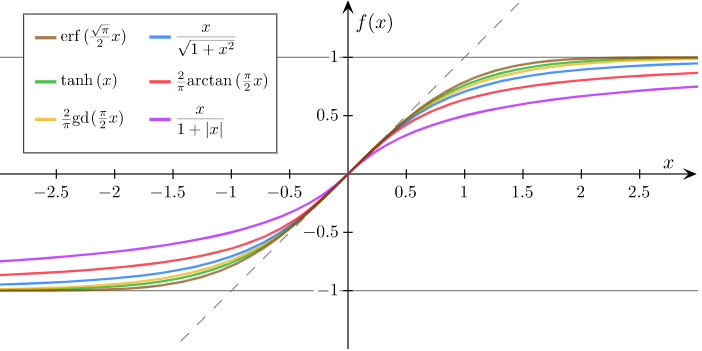

#### Rectifier

In the context of artificial neural networks, the rectifier is an activation function defined as the positive part of its argument:

$$\large f(u)=u^{+}=\max(0,u)$$

#### Example

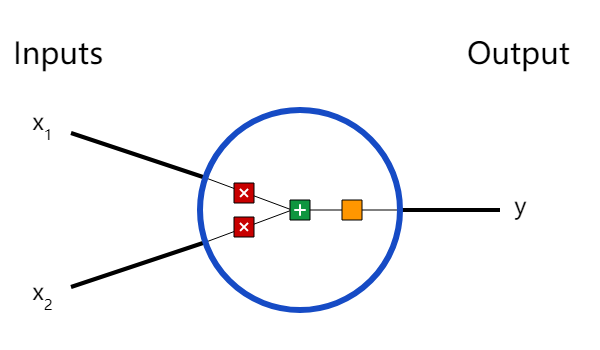

Assume we have a 2-input (two features) neuron that uses the sigmoid activation function and has the following parameters:

$$w=[0,1]$$
$$b = 4$$

$w=[0,1]$ is just a way of writing $w_1 = 0, w_2 = 1$ in vector form and $b$ is $w_0$

Now the sample input of the two features is $x=[2,3]$

$(w⋅x)+b$

$=((w_1∗x_1)+(w_2∗x_2))+b$

$=0∗2+1∗3+4$

$=7$
 
$y$
$=f(w⋅x+b)$

$=f(7)$

$={\frac {1}{1+e^{-7}}}$

$=0.999$


The neuron outputs 0.9990.999 given the inputs $x = [2, 3]$. That’s it! 

This process of passing inputs forward to get an output is known as <b>feedforward</b>.

### Layers

Combining Neurons into a Neural Network

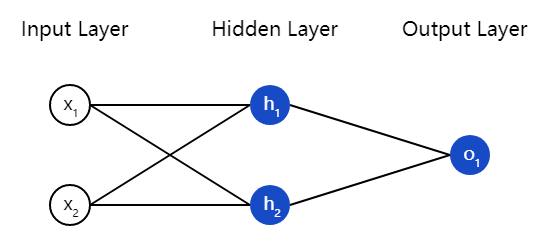

* This network has 2 inputs, a hidden layer with 2 neurons ($h_1$ and $h_2$), and an output layer with 1 neuron ($o_1$). 
* Notice that the inputs for $o_1$ are the outputs from $h_1$ and $h_2$ - that’s what makes this a network.
* A hidden layer is any layer between the input (first) layer and output (last) layer. There can be multiple hidden layers

#### Example

* Assume all neurons have the same weights $w = [0, 1]$, the same bias $b = 0$, and the same sigmoid activation function. 
* Let $h_1$, $h_2$, $o_1$ denote the outputs of the neurons they represent.
* So what will be the output $o_1$ if we pass in the input $x = [2, 3]$?

$h_1=h_2$

$=f(w⋅x+b)$

$=f((0∗2)+(1∗3)+0)$

$=f(3)$

$={\frac {1}{1+e^{-3}}}$

$=0.9526$ 

Then the output of $o_1$ is

$o_1=f(w⋅[h_1,h_2]+b)$

$=f((0∗h_1)+(1∗h_2)+0)$

$=f(0.9526)$

$={\frac {1}{1+e^{-0.9526}}}$

$=0.7216$

* Here we built a neural network with the same weights $w = [0, 1]$, the same bias $b = 0$ for all neurons. 
* For any input $x$, we can feed the input forward through the neurons in the network to get the output at the end. 
* <b>The only remained question is, how to make this neural network useful (aka, find the right $w$ and $b$ so that this neural network can predict)<b>

### Train a neural network

Let's say we have the training data set. The goal is to predict someone’s gender given their weight and height

| Name    | Weight (lb) | Height (in) | Gender |
| ------- | ----------- | ----------- | ------ |
| Alice   | 133         | 65          | F      |
| Bob     | 160         | 72          | M      |
| Charlie | 152         | 70          | M      |
| Diana   | 120         | 60          | F      |

Then the neural network will be like

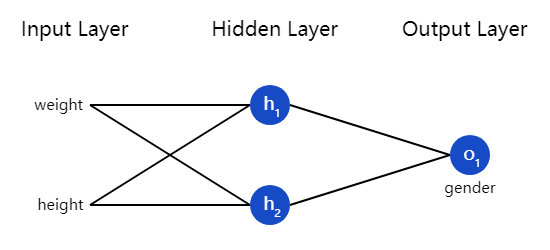

We’ll represent Male with a 0 and Female with a 1, and we’ll also shift the data to make it easier to use:

| Name    | Weight (minus 135) | Height (minus 66) | Gender    |
| ------- | ------------------ | ----------------- | --------- |
| Alice   | \-2                | \-1               | 1         |
| Bob     | 25                 | 6                 | 0         |
| Charlie | 17                 | 4                 | 0         |
| Diana   | \-15               | \-6               | 1|

#### Loss function

We’ll use the mean squared error (MSE) loss:

$\large \text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_{true} - y_{pred})^2$

 
where 

* $n$ is the number of samples, which is 4 (Alice, Bob, Charlie, Diana).
* $y$ represents the variable being predicted, which is Gender.
* $y_{true}$ is the true value of the variable (the "ground truth"). 
* $y_{pred}$ is the predicted value of the variable. It's whatever our network outputs. It is a float number between 0 and 1


* <b>Loss is as a function of weights and biases.</b>
* <b>Training is the process of finding the right $w$ and $b$ to minimize the loss function.</b>

In our neural network, we will have 6 $w$ and 3 $b$ as below 

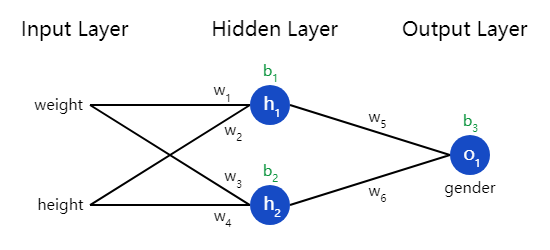

The loss function is a function of all the 9 variables

$\large L(w_1, w_2, w_3, w_4, w_5, w_6, b_1, b_2, b_3)$

$\large = \text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_{true} - y_{pred})^2$


Then the rest of the problem becomes an optimization problem. How to tweak those $w_i$ and $b_i$ so that we will reach the minimum of $L$?

#### Backpropagation

* An algorithm for supervised learning of artificial neural networks using gradient descent.
* Given an artificial neural network and an error function, the method calculates the gradient of the error function with respect to the neural network's weights.
* The "backwards" part of the name stems from the fact that calculation of the gradient proceeds backwards through the network, with the gradient of the final layer of weights being calculated first and the gradient of the first layer of weights being calculated last.

#### The idea of finding $w_i$ and $b_i$ is very simple

All we need to know is, if we tweak one variable, say $w_1$, would $L$ become bigger or smaller and by how much. Then we know how to update $w_i$ to make $L$ smaller.

In math, it is the partial derivative 

$$\large {\frac {∂L}{∂w_1}}$$

Based on chain rule, rewrite the above

$$\large {\frac {∂L}{∂w_1}}={\frac {∂L}{∂y_{pred}}}*{\frac {∂y_{pred}}{∂h_1}}*{\frac {∂h_1}{∂w_1}}$$

where each part of the above components can be computed

* This system of calculating partial derivatives by working backwards is known as backpropagation

#### Example

Let's start with the first sample

| Name  | Weight (minus 135) | Height (minus 66) | Gender    |
| ----- | ------------------ | ----------------- | --------- |
| Alice | \-2                | \-1               | 1|

##### Step 1: Choose initial wrights and biases. Here we use $w_i=1$ and $b_j=0$

The feedforward pass through the network is

$\begin{aligned} h_1 &=f(w_1 x_1 + w_2 x_2 + b_1) \\ &=f(−2+−1+0) \\ &=0.0474 \\ \end{aligned}$


$h_2 = f(w_3x_1 + w_4x_2 + b_2) = 0.0474$

$\begin{aligned} o_1 &= f(w_5h_1 + w_6h_2 + b_3) \\ &= f(0.0474 + 0.0474 + 0) \\ &= 0.524 \\ \end{aligned}$

So the prediction is $y_{pred}=0.524$, which is different from $y_{true}=1$

Now let's work on $w_1$. If I tweak $w_1$ to a little bit higher, would L become higher or lower?

##### Step 2: Compute $\large {\frac {∂L}{∂w_1}}$

$\large \frac{\partial L}{\partial w_1} = \frac{\partial L}{\partial y_{pred}} * \frac{\partial y_{pred}}{\partial h_1} * \frac{\partial h_1}{\partial w_1}$
 
$\begin{aligned} \frac{\partial L}{\partial y_{pred}} &=\frac{\partial \text{MSE}}{\partial y_{pred}} \\ &=\frac{\partial (1 - y_{pred})^2}{\partial y_{pred}} \\ &= -2(1 - y_{pred}) \\ &= -2(1 - 0.524) \\ &= -0.952 \\ \end{aligned}$
 
$\begin{aligned} \frac{\partial y_{pred}}{\partial h_1} &= w_5 * f'(w_5h_1 + w_6h_2 + b_3) \\ &= 1 * f'(0.0474 + 0.0474 + 0) \\ &= f(0.0948) * (1 - f(0.0948)) \\ &= 0.249 \\ \end{aligned}$
 
$\begin{aligned} \frac{\partial h_1}{\partial w_1} &= x_1 * f'(w_1x_1 + w_2x_2 + b_1) \\ &= -2 * f'(-2 + -1 + 0) \\ &= -2 * f(-3) * (1 - f(-3)) \\ &= -0.0904 \\ \end{aligned}$
 
$\begin{aligned} \frac{\partial L}{\partial w_1} &= -0.952 * 0.249 * -0.0904 \\ &= \boxed{0.0214} \\ \end{aligned}$

 
Notes: Derivate of the sigmoid function

$f(x) = \frac{1}{1 + e^{-x}}$

$f'(x) = \frac{e^{-x}}{(1 + e^{-x})^2} = f(x) * (1 - f(x))$

##### Step 3: Update $w_1$ by Stochastic Gradient Descent

Now we know if $w_1$ increases by one unit, $L$ will increase by 0.0214 unit. Or if $w_1$ decreases by one unit, $L$ will decrease by 0.0214 unit.

It’s basically just this update equation:

$$\large w_1 \leftarrow w_1 - \eta \frac{\partial L}{\partial w_1}$$

where 

* $\eta$ is a constant called the learning rate that controls how fast we train. 
* If $\frac{\partial L}{\partial w_1} $ is positive, $w_1$ will decrease, which makes $L$ decrease.
* If $\frac{\partial L}{\partial w_1} $ is negative, $w_1$ will increase, which makes $L$ decrease.
* If we do this for every weight and bias in the network, the loss will slowly decrease and our network will improve.

##### Step 4: repeat step 2,3 to update all $w$ and $b$ for this sample

##### Step 5: repeat step 1,2,3,4 for all training samples

### Rethink about neural network

* What is the neural network model?
    - a very complicated non-linear function to fit your training data
    - calibrate the function to fit training data well
* Does the backpropagation algorithm always find the optimal $w$ and $b$ to have the global minimum of $L$?
    - The main challenge is to iteratively update our initial guess so that we find the right set of parameters that converge to the minimum of the loss landscape.
    - One best practice to tuning the learning rate is to initially set it to a relatively high value like 0.1 to stall the network resulting in large loss, and then successively halve the learning rate until the network begins to show signs of convergence. 


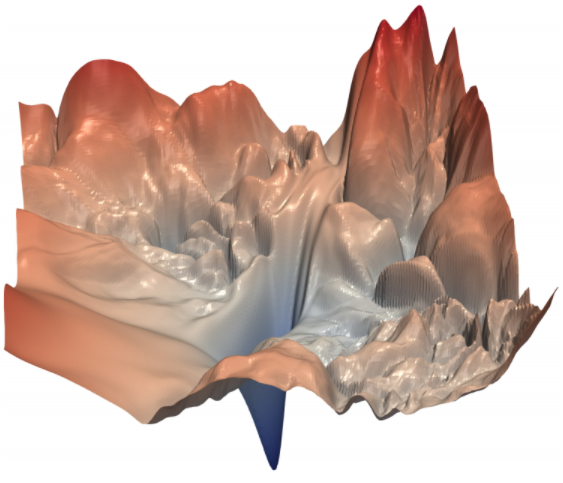

### TensorFlow

* pip install tensorflow
* https://support.microsoft.com/en-us/help/2977003/the-latest-supported-visual-c-downloads

#### What is TensorFlow?

* TensorFlow is an open-source software library for dataflow programming across a range of tasks. 
* It is a symbolic math library, and is also used for machine learning applications such as neural networks. 

#### Why use TensorFlow?

* Very large and active community (compare with other machine learning frameworks such as H2O)
* Low-level and high-level interfaces to network training
* Tensorboard is the powerful visualization suite which is developed to track both the network topology and performance, making debugging even simpler.
* Written in Python (some parts in C++)
* Support GPU. 

In [1]:
import tensorflow as tf
tf.__version__

'1.15.0'

In [2]:
# run the code below to use TensorFlow 1.15 syntax because most of the code is still in 1.15

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
tf.disable_eager_execution()
import warnings
warnings.filterwarnings('ignore')

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
tf.__version__

'1.15.0'

In [4]:
# Check version
print("Tensorflow version: ", tf.__version__)

# Test TensorFlow for cuda availibility
print("Tensorflow is built with CUDA: ", tf.test.is_built_with_cuda())

# Check devices
print("All devices: ", tf.config.experimental.list_physical_devices(device_type=None))
print("GPU devices: ", tf.config.experimental.list_physical_devices(device_type='GPU'))

# Print a randomly generated tensor
# tf.math.reduce_sum: https://www.tensorflow.org/api_docs/python/tf/math/reduce_sum
# tf.random.normal: https://www.tensorflow.org/api_docs/python/tf/random/normal
print(tf.math.reduce_sum(tf.range(10)))

Tensorflow version:  1.15.0
Tensorflow is built with CUDA:  True
All devices:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
GPU devices:  []
Tensor("Sum:0", shape=(), dtype=int32)


#### Your first code in TensorFlow

If you can see the result "welcome" then your installation is successful

In [5]:
msg=tf.constant('welcome')
with tf.Session() as sess:
    print(sess.run(msg).decode())

welcome


#### Introduction

* Computational graph and Lazy computing
    - A TensorFlow computation is represented as a dependency graph like Excel.
    - Lazy Computing: The graph isn't actually performing the computation until asked.
    
* Basically, all Tensorflow codes contain two important steps:
    - building the GRAPH, it represents the data flow of the computations
    - running a SESSION, it executes the operations in the graph
    - TensorFlow separates the definition of computations from their execution. 

#### What is a Tensor? 

* TensorFlow programs use a data structure called tensor to represent all the data. 
* Any type of data you plan to use for your model can be stored in Tensors. 
* In other words, a Tensor is a multi-dimensional array (0-D tensor: scalar, 1-D tensor: vector, 2-D tensor: matrix, and so on). 
* TensorFlow is simply referring to the flow of the Tensors in the computational graph

<img src="https://tinyurl.com/y6f9j3r9" align="center">

#### What is computational graph?

* A computational graph (or graph in short) is a series of TensorFlow operations arranged into a graph of nodes
* All the numerical computations are expressed as a computational graph
* Anything that happens in your model is represented by the computational graph.
* <b>It is like setting up all machines and raw materials in a factory but hasn't started to make products</b>


##### For example, how to construct a computational graph for the function below?

$$\large f(x, y)=x^2*y + y + 2$$

The graph will be like

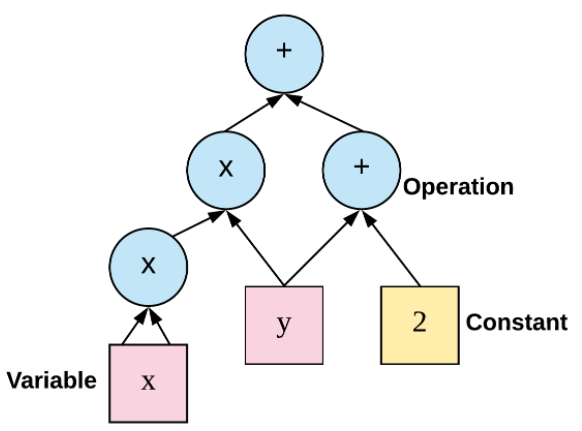

* The graph is composed of a series of nodes connected to each other by edges. 
* Each node in the graph is called op (short for operation). 
* So we'll have one node for each operation; either for operations on tensors (like math operations) or generating tensors (like variables and constants). 
* Each node takes zero or more tensors as inputs and produces a tensor as an output.

##### Let's start to build a very simple graph in TensorFlow

$$\large c=a+b $$

where
$a=2$ and $b=3$

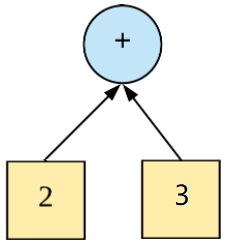

In [6]:
a = 2
b = 3
c = tf.add(a, b, name='Add')
print(c)

Tensor("Add:0", shape=(), dtype=int32)


* This code creates two input nodes (for inputs a=2 and b=3) 
* One output node for the addition operation (named Add). 
* When we print out the variable c, it prints out the Tensor information; its name (Add), shape (() means scalar), and type (32-bit integer).

###### We noticed that it doesn't actually evaluate the graph to get the result. It returns a "Tensor" object.

##### To actually evaluate the nodes, we must run the computational graph within a Session

* To evaluate a graph, the graph must be launched in a session. 
* Technically, session places the graph operations on hardware such as CPUs or GPUs and provides methods to execute them. 
* In our example, to run the graph and get the value for c the following code will create a session and execute the graph by running 'c':

In [7]:
sess = tf.Session()
print(sess.run(c))
sess.close()

5


#### A little syntax sugar. Using "with" context management in Python

* So that you don't have to close the session at the end. "with" context will do it automatically for you.
* It also guarantees the session closed at the end even when exception happens in the middle of running.

In [8]:
with tf.Session() as sess:
    print(sess.run(c))

5


In [9]:
range_t = tf.linspace(2.0,5.0,5)
range_t

<tf.Tensor 'LinSpace:0' shape=(5,) dtype=float32>

In [10]:
with tf.Session() as sess:
    print(sess.run(range_t))

[2.   2.75 3.5  4.25 5.  ]


In [11]:
range_t = tf.range(10)
with tf.Session() as sess:
    print(sess.run(range_t))

[0 1 2 3 4 5 6 7 8 9]


##### Another example:



In [12]:
x = 2
y = 3
add_op = tf.add(x, y, name='Add')
mul_op = tf.multiply(x, y, name='Multiply')
pow_op = tf.pow(add_op, mul_op, name='Power')
useless_op = tf.multiply(x, add_op, name='Useless')

with tf.Session() as sess:
    pow_out, useless_out = sess.run([pow_op, useless_op])
    print(pow_out, useless_out)

15625 10


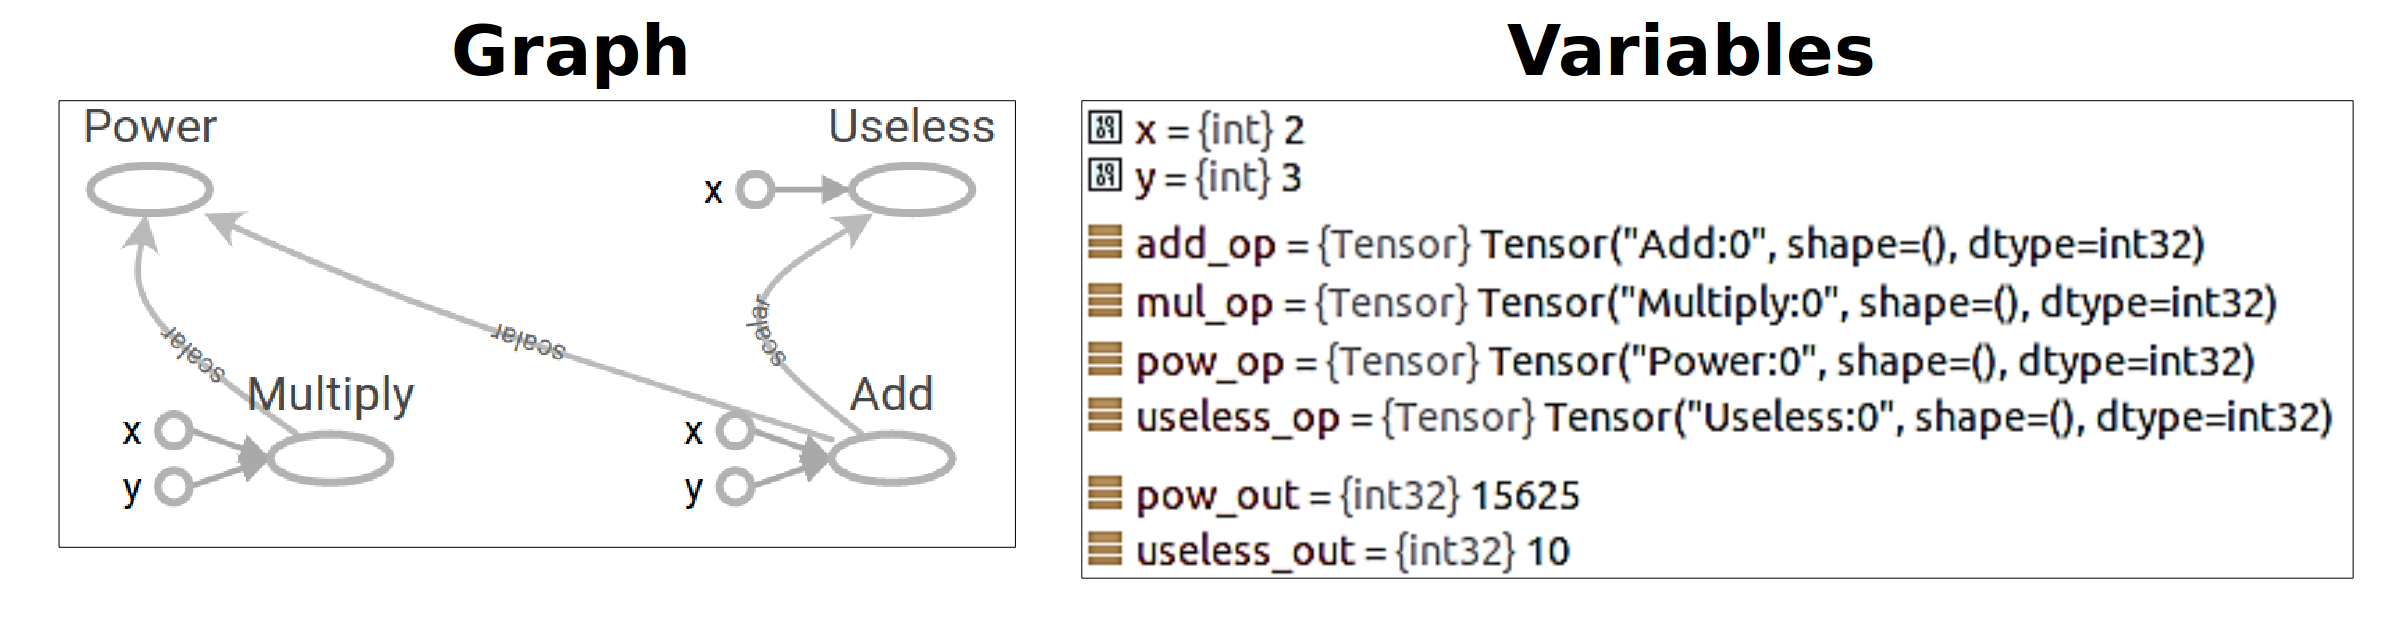

#### Tensor Types in TensorFlow

* TensorFlow does have its own data structure for the purpose of performance and ease of use. 
* Tensor is the data structure used in Tensorflow (remember TensorFlow is the flow of tensors in a computational graph) and it is at the core of TensorFlow. 
* TensorFlow programs use a tensor data structure to represent all data — only tensors are passed between operations in the computation graph. 


* The types used in creating neural network models are 
    - Constant
    - Variable
    - Placeholder

##### 1. Constant

* Constants are used as constants. 
* They create a node that takes value and it does not change.

In [13]:
# create graph
a = tf.constant(2)
b = tf.constant(3)
c = a + b
# launch the graph in a session
with tf.Session() as sess:
    print(sess.run(c))

5


In [14]:
a = tf.constant(2, name='A')
b = tf.constant(3, name='B')
c = tf.add(a, b, name='Sum')
# launch the graph in a session
with tf.Session() as sess:
    print(sess.run(c))

5


##### Constants can also be defined with different types (integer, float, etc.) and shapes (vectors, matrices, etc.). The next example has two constants with type vectors.

In [15]:
v_1=tf.constant([1,2,3,4])
v_2=tf.constant([2,3,4,5])

##### The operation "add" is a vectorized function that also works on vectors.

##### Here we run vector + vector

In [16]:
v_add=tf.add(v_1, v_2)

In [17]:
with tf.Session() as sess:
    print(sess.run(v_add))

[3 5 7 9]


##### Here we try scalar + vector. This victorized function behavior is very similar to pandas

In [18]:
v_1=tf.constant(1)
v_2=tf.constant([2,3,4,5])
v_add=tf.add(v_1, v_2)
with tf.Session() as sess:
    print(sess.run(v_add))

[3 4 5 6]


##### 2. Variable

* Variables are stateful nodes which output their current value
* Gradient updates (used in all neural networks) will apply to all variables in your graph. 
* In fact, variables are the things that you want to tune in order to minimize the loss.

* Difference between constants and variables

    - Constants value doesn't change. We'd usually need our network parameters to be updated and that's where the variable comes into play.

    - Constants are stored in the graph definition which makes them memory-expensive. 
    
* Notes:
    - Creating a variables is an operation
    - Execute these operations in the session and get the output value of the operations

In [19]:
b = tf.Variable(2.0)
print(b)

<tf.Variable 'Variable:0' shape=() dtype=float32_ref>


* Variables need to be initialized before being used. 
* The easiest way to initialize variables all variables at once is the global variables initializer operation.

In [20]:
# add an Op to initialize global variables
init_op = tf.global_variables_initializer() # <------------ DO NOT FORGET THIS
with tf.Session() as sess:
    # run the variable initializer operation
    sess.run(init_op)  # <------------ DO NOT FORGET THIS
    print(sess.run(b))

2.0


##### Variables are suitable to be used as the network parameters (i.e. weights and biases)

* Weights are usually initialized from a normal distribution using tf.truncated_normal_initializer().

* Biases are usually initialized from zeros using tf.zeros_initializer().

##### Example: Initialize weight $w_i$ and bias $b_j$ in neural network model

In [21]:
# create graph
weights = tf.get_variable(name="W", shape=[6], initializer=tf.truncated_normal_initializer(stddev=0.01))
biases = tf.get_variable(name="b", shape=[3], initializer=tf.zeros_initializer())

# add an Op to initialize global variables
init_op = tf.global_variables_initializer()

# launch the graph in a session
with tf.Session() as sess:
    # run the variable initializer
    sess.run(init_op)
    # now we can run our operations
    W, b = sess.run([weights, biases])
    print('weights = {}'.format(W))
    print('biases = {}'.format(b))

weights = [ 0.01090613 -0.00857948  0.010316    0.01873188  0.00526267  0.00395252]
biases = [0. 0. 0.]


In [22]:
# first, create a TensorFlow constant
const = tf.constant(2.0)
    
# create TensorFlow variables
b = tf.Variable(2.0)
c = tf.Variable(1.0)

In [23]:
# now create some operations
d = tf.add(b, c)
e = tf.add(c, const)
a = tf.multiply(d, e)

In [24]:
with tf.Session() as sess:
    print(sess.run(const))

2.0


In [25]:
# setup the variable initialisation
init_op = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init_op)
    print(sess.run(b))
    print(sess.run(d))
    print(sess.run(a))

2.0
3.0
9.0


In [26]:
f=tf.Variable(b.initialized_value())

init_op = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init_op)
    print(sess.run(f))

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
2.0


##### 3. Placeholder

* Placeholders are more basic than a variable. 
* It is simply a variable that we asign data in a future time. 
* Placeholders are nodes whose value is fed in at execution time.
* Placeholders don't need any initial value; only a datatype (such as float32) and a tensor shape so the graph still knows what to compute with even though it doesn't have any stored values yet.

#### You need to create a dict whose key(s) are the placeholders and their values are the desired value to be passed to the placeholder(s), and feeding it to an argument called "feed_dict". 

In [27]:
a = tf.constant([5, 5, 5], tf.float32, name='A')
b = tf.placeholder(tf.float32, shape=[3], name='B')
c = tf.add(a, b, name="Add")

with tf.Session() as sess:
    # create a dictionary:
    d = {b: [1, 2, 3]}
    # feed it to the placeholder
    print(sess.run(c, feed_dict=d))

[6. 7. 8.]


In [28]:
x=tf.placeholder("float")
y=2*x
print(y)
data=tf.random_uniform([4,5], 10)
with tf.Session() as sess:
    x_data=sess.run(data)
    print(sess.run(y, feed_dict={x: x_data}))

Tensor("mul_1:0", dtype=float32)
[[ 7.9910097  8.969196  15.156851   9.367408   4.6910877]
 [19.657612   5.492607   2.1446152  9.463549   3.2659626]
 [18.250841   5.7206955 15.399243   2.101757  14.405185 ]
 [ 9.591192   6.2392035 11.1295595  5.985112   3.6351147]]


In [29]:
tf.summary.scalar('a', a)

<tf.Tensor 'a_2:0' shape=() dtype=string>

### Build a Neural Network using TensorFlow

* Now, we have all the required materials to start building a feed-forward neural network
* In real-world problems, we split the input set into several shorter pieces (called mini-batch) of size B (called mini-batch size) inputs, and feed them one by one. 
* This is called "Stochastic Gradient Descent". The process of feeding each mini-batch of size B to the network, back-propagating errors, and updating the parameters (weights and biases) is called an iteration.

In [30]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
#from sklearn.metrics import classification_report

digits = load_digits()
print(digits.data.shape)
print(digits.data[0])

(1797, 64)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


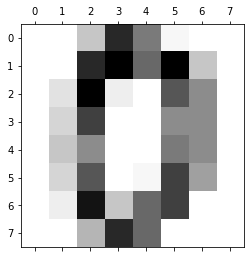

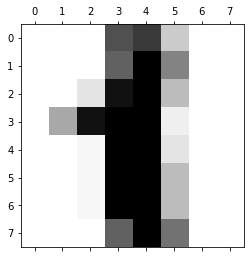

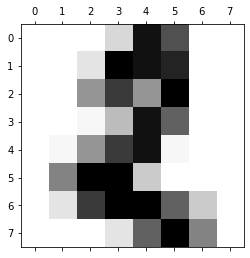

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.matshow(digits.data[0].reshape(8, 8), cmap=plt.cm.Greys)
plt.matshow(digits.data[1].reshape(8, 8), cmap=plt.cm.Greys)
plt.matshow(digits.data[2].reshape(8, 8), cmap=plt.cm.Greys)

In [32]:
X, y = digits.data, digits.target
y = OneHotEncoder().fit_transform(y.reshape(-1, 1)).toarray()
# y=OneHotEncoder().fit_transform(y[:,np.newaxis])
print(X[0])
print(y[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [34]:
def add_layer(input, in_size, out_size, activation=None):
    W = tf.Variable(tf.random_normal([in_size, out_size]), 'W')
    b = tf.Variable(tf.zeros([out_size]) + 0.1, 'b')
    output = tf.matmul(input, W) + b
    if activation is None:
        return output
    else:
        return activation(output)

##### Placeholders for inputs

* We generally use Placeholders for inputs so that we can build the graph without any real value in context.
* The only point is that you need to choose the proper size for the input. 
* Here, we have a feed-forward neural network, and let's assume inputs of size 64 (similar to 8x8 images of data). 


The input placeholder can be written as:

* The first dimension represents the number of samples (images in your case). 
* The reason why you do not want to hardcode a specific number there is to keep things flexible and allow for any number of samples. 
* By putting None as the first dimension of the tensor you enable that.

In [35]:
xs = tf.placeholder(tf.float32, [None, 64])
ys = tf.placeholder(tf.float32, [None, 10])

##### Build the two layers and choose the activation function for the first layer

All available activation functions:

    tf.nn.relu
    tf.nn.relu6
    tf.nn.crelu
    tf.nn.elu
    tf.nn.softplus
    tf.nn.softsign
    tf.nn.dropout
    tf.nn.bias_add
    tf.sigmoid
    tf.tanh



In [36]:
# l1 = add_layer(xs, 64, 100, tf.nn.sigmoid)
l1 = add_layer(xs, 64, 100, tf.nn.tanh) #64 features, 100 neurons in this layer
l2 = add_layer(l1, 100, 10) #100 features from the previous layer, then 10 neurons in this layer to predict 0 to 9

##### Implement the loss function

* The functionality of numpy.mean and tensorflow.reduce_mean are the same. 
* reduce_mean is a concept from functional programming, which makes it possible for reduce_mean in TensorFlow to keep a running average of the results of computations from a batch of inputs.
    - similar to `reduce(lambda x,y: x+y, [1,2,5,4])`
* softmax is usually used together with cross_entropy. Tensorflow provides `tf.nn.softmax_cross_entropy_with_logits_v2`
    - The Softmax function produces an output which is a range of values between 0 and 1, with the sum of the probabilities been equal to 1.

    - The standard (unit) softmax function $ \sigma :\mathbb {R} ^{K}\to \mathbb {R} ^{K}$is defined by the formula

$$ \sigma (\mathbf {z} )_{i}={\frac {e^{z_{i}}}{\sum _{j=1}^{K}e^{z_{j}}}}{\text{ for }}i=1,\dotsc ,K{\text{ and }}\mathbf {z} =(z_{1},\dotsc ,z_{K})\in \mathbb {R} ^{K}$$

In [37]:
import numpy as np
a = [1.0, 2.0, 3.0]
np.exp(a) / np.sum(np.exp(a)) 

array([0.09003057, 0.24472847, 0.66524096])

In [38]:
#avoid overflow of big exp value

import numpy as np

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

scores = [3.0, 1.0, 0.2]
print(softmax(scores))
print(sum(softmax(scores)))

[0.8360188  0.11314284 0.05083836]
0.9999999999999999


In [39]:
loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(labels=ys, logits=l2))

##### Choose gradient descent optimizer algorithm to minimize the loss function

* set learning rate to be 0.2

TensorFlow provides many optimizers

```
tf.train.Optimizer
tf.train.GradientDescentOptimizer
tf.train.AdadeltaOptimizer
tf.train.AdagradOptimizer
tf.train.AdagradDAOptimizer
tf.train.MomentumOptimizer
tf.train.AdamOptimizer
tf.train.FtrlOptimizer
tf.train.ProximalGradientDescentOptimizer
tf.train.ProximalAdagradOptimizer
tf.train.RMSPropOptimizer
```

In [40]:
optimizer = tf.train.GradientDescentOptimizer(0.2)
train = optimizer.minimize(loss)

##### Train this neural network

In [41]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
for i in range(1000):
    sess.run(train, {xs: X_train, ys: y_train})

##### Prediction and model evaluation

In [42]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [43]:
sess.run(tf.argmax(y_test, 1))

array([4, 3, 5, 0, 8, 1, 9, 4, 8, 5, 5, 3, 3, 0, 2, 0, 8, 0, 4, 4, 7, 2,
       4, 3, 1, 7, 7, 6, 5, 2, 1, 6, 0, 4, 8, 1, 8, 7, 6, 1, 8, 1, 9, 7,
       2, 8, 0, 7, 0, 8, 9, 0, 3, 8, 1, 0, 2, 6, 1, 5, 3, 1, 6, 5, 4, 6,
       5, 3, 9, 0, 4, 4, 1, 2, 4, 8, 0, 3, 7, 0, 5, 9, 4, 1, 2, 1, 3, 7,
       1, 8, 5, 8, 3, 0, 1, 2, 4, 1, 7, 3, 8, 2, 3, 3, 8, 2, 4, 8, 3, 3,
       8, 2, 0, 9, 2, 4, 2, 0, 6, 7, 0, 6, 0, 8, 1, 3, 7, 8, 6, 5, 6, 4,
       3, 9, 5, 6, 2, 5, 5, 5, 0, 1, 1, 2, 4, 1, 2, 3, 5, 8, 5, 3, 4, 0,
       7, 2, 4, 5, 2, 1, 5, 8, 9, 3, 1, 3, 1, 7, 6, 7, 7, 0, 3, 8, 8, 0,
       1, 3, 2, 6, 9, 4, 3, 4, 5, 2, 9, 6, 0, 2, 7, 0, 4, 8, 3, 0, 7, 8,
       5, 3, 4, 3, 6, 2, 5, 8, 4, 5, 5, 2, 7, 1, 9, 9, 1, 6, 1, 7, 9, 8,
       4, 5, 7, 6, 8, 3, 0, 4, 2, 1, 4, 3, 3, 0, 7, 7, 2, 3, 8, 2, 4, 5,
       2, 9, 2, 8, 3, 0, 1, 4, 5, 7, 1, 1, 8, 6, 6, 4, 0, 5, 4, 2, 9, 7,
       4, 7, 9, 6, 6, 8, 3, 8, 1, 4, 7, 2, 2, 5, 5, 5, 1, 2, 3, 3, 4, 6,
       3, 3, 6, 6, 7, 3, 7, 7, 0, 6, 6, 7, 7, 2, 4,

In [44]:
sess.run(tf.argmax(l2, 1), {xs: X_test})

array([4, 3, 9, 0, 8, 1, 9, 7, 8, 5, 5, 3, 3, 0, 2, 0, 9, 0, 4, 4, 7, 2,
       4, 3, 1, 7, 7, 6, 5, 2, 8, 6, 0, 4, 8, 8, 8, 7, 6, 1, 8, 1, 5, 7,
       2, 8, 0, 7, 0, 8, 8, 0, 3, 5, 1, 0, 2, 6, 1, 5, 3, 8, 6, 5, 4, 6,
       5, 3, 9, 0, 4, 4, 1, 1, 4, 3, 0, 3, 7, 0, 5, 9, 4, 1, 2, 1, 3, 9,
       1, 8, 5, 8, 3, 4, 1, 3, 4, 1, 7, 3, 8, 2, 3, 3, 5, 3, 4, 8, 3, 3,
       8, 2, 6, 9, 2, 4, 2, 0, 6, 7, 0, 6, 0, 8, 1, 3, 7, 8, 6, 5, 6, 1,
       3, 9, 5, 6, 2, 5, 8, 5, 0, 1, 1, 2, 4, 3, 2, 3, 5, 8, 5, 3, 4, 0,
       7, 2, 4, 5, 2, 1, 5, 8, 1, 3, 4, 3, 1, 7, 6, 7, 7, 0, 3, 8, 8, 0,
       8, 2, 3, 6, 9, 4, 3, 4, 5, 8, 9, 6, 0, 2, 8, 0, 4, 1, 9, 5, 7, 8,
       5, 3, 4, 5, 6, 2, 5, 8, 4, 5, 5, 2, 7, 1, 9, 9, 1, 6, 1, 7, 9, 8,
       4, 5, 7, 6, 8, 3, 0, 4, 2, 1, 4, 3, 3, 0, 7, 7, 2, 3, 3, 2, 4, 5,
       2, 9, 2, 8, 3, 0, 9, 5, 5, 7, 1, 1, 8, 6, 6, 4, 0, 7, 4, 2, 4, 7,
       4, 7, 9, 6, 6, 4, 3, 7, 1, 4, 7, 2, 2, 5, 5, 5, 1, 2, 3, 3, 4, 6,
       3, 7, 6, 6, 7, 3, 7, 7, 0, 6, 6, 7, 7, 2, 4,

In [45]:
result=sess.run(tf.equal(tf.argmax(y_test, 1), tf.argmax(l2, 1)), {xs: X_test})
result

array([ True,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [46]:
sess.run(tf.reduce_mean(tf.cast(result, tf.float32)))

0.8518519

In [47]:
result = tf.equal(tf.argmax(y_test, 1), tf.argmax(l2, 1))
acc = tf.reduce_mean(tf.cast(result, tf.float32))
print(sess.run(acc, {xs: X_test}))

0.8518519


References:

https://victorzhou.com/blog/intro-to-neural-networks/

https://github.com/vuptran/introduction-to-neural-networks/blob/master/intro_neural_network.ipynb

https://www.easy-tensorflow.com/tf-tutorials/neural-networks/two-layer-neural-network

https://github.com/easy-tensorflow/easy-tensorflow

http://home.agh.edu.pl/~vlsi/AI/backp_t_en/backprop.html